In [61]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import os
import matplotlib.pyplot as plt
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import keras

In [2]:
def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=float,skip_header=1)

#### read input files 

In [4]:
trainX = csv_to_numpy_array("../prod_centricity/trainX.csv", delimiter=",")
trainY = csv_to_numpy_array("../prod_centricity/trainY.csv", delimiter=",")
testX = csv_to_numpy_array("../prod_centricity/testX.csv", delimiter=",")
testY = csv_to_numpy_array("../prod_centricity/testY.csv", delimiter=",")

#### preprocess x to normalize input (DONT do on labels) for faster convergence and to avoid numerical stability issues like overflow or underflow

In [28]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn import preprocessing
trainX_norm = preprocessing.scale(trainX)


#### initialize the model with fully connected layers

In [78]:
# Build the Fully Connected Neural Network in Keras Here
model = Sequential()
model.add(Dense(10,input_dim=4,name='layer1'))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,name='layer2'))
model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('softmax'))

In [79]:
from keras.callbacks import TensorBoard
model.compile('adam', 'binary_crossentropy', ['accuracy'])
history = model.fit(trainX_norm, trainY, nb_epoch=300,callbacks=[TensorBoard(log_dir='./Graph',histogram_freq=0,write_graph=True)])

Epoch 1/300
211/211 [==============================] - 0s - loss: 0.6632 - acc: 0.5687     
Epoch 2/300
211/211 [==============================] - 0s - loss: 0.6495 - acc: 0.6066     
Epoch 3/300
211/211 [==============================] - 0s - loss: 0.6358 - acc: 0.6114     
Epoch 4/300
211/211 [==============================] - 0s - loss: 0.6234 - acc: 0.6351     
Epoch 5/300
211/211 [==============================] - 0s - loss: 0.6098 - acc: 0.6730     
Epoch 6/300
211/211 [==============================] - 0s - loss: 0.5972 - acc: 0.7062     
Epoch 7/300
211/211 [==============================] - 0s - loss: 0.5861 - acc: 0.7488     
Epoch 8/300
211/211 [==============================] - 0s - loss: 0.5736 - acc: 0.7867     
Epoch 9/300
211/211 [==============================] - 0s - loss: 0.5617 - acc: 0.8294     
Epoch 10/300
211/211 [==============================] - 0s - loss: 0.5506 - acc: 0.8578     
Epoch 11/300
211/211 [==============================] - 0s - loss: 0.5389 - acc

#### lets evaluate on our test set

In [80]:
score = model.evaluate(preprocessing.scale(testX), testY, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.39896131939483137)
('Test accuracy:', 0.90566037735849059)


#### lets visualize our model

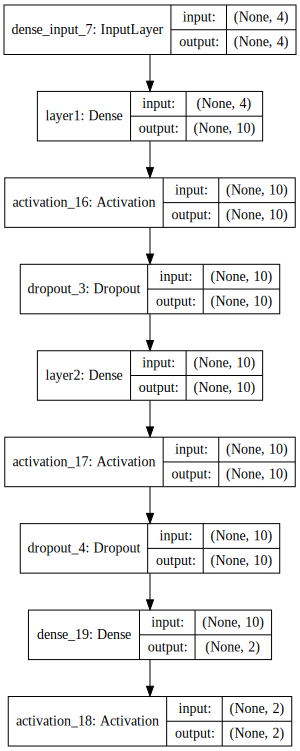

In [59]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
SVG(model_to_dot(model,show_shapes = True,show_layer_names = True).create(prog='dot', format='svg'))
#from keras.utils.visualize_util import plot
#plot(model, to_file='nn_prodcentricity_model.jpg')

In [42]:
type(history)

keras.callbacks.History

In [69]:
tbcallback = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,  write_graph=True)


In [73]:
os.getcwd()

'/home/local/ANT/badeepak/imagesnaps'

In [ ]:
tensorboard --logdir imagesnaps/Graph